<a href="https://colab.research.google.com/github/fikatriana/Pemograman_Python/blob/main/TUGAS%20BESAR%20PYTHON%20(Fika%20Triana_1101194018).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FIKA TRIANA - 1101194018 - TT-43-G1 - TUGAS BESAR PYTHON 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #meter
hr = 1.5 #meter
d = np.random.randint(300,1001,200)
y1=d**2
y2=d**3
y3=d**4 

In [3]:
print(d)

[325 967 455 831 635 850 331 834 977 402 949 817 370 423 427 841 705 558
 865 659 815 405 542 934 658 982 577 928 898 495 598 596 337 340 371 908
 392 741 413 960 727 920 408 650 984 955 811 412 861 816 698 908 877 422
 948 496 616 334 810 986 400 624 595 799 837 415 752 727 938 529 942 817
 367 802 549 984 862 410 552 579 477 823 651 664 393 502 376 627 326 321
 579 304 513 458 769 525 848 379 598 747 405 850 470 440 542 488 862 470
 424 867 600 550 413 441 413 784 912 472 572 426 868 742 495 303 604 678
 429 793 939 596 978 320 667 731 389 828 345 517 502 568 369 340 566 580
 468 809 678 456 525 841 384 983 861 891 587 336 403 973 770 873 592 833
 670 891 731 752 566 834 672 642 837 709 937 846 823 618 935 897 363 777
 451 506 442 326 622 873 677 650 315 367 526 668 799 999 542 648 306 843
 931 839]


In [15]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
      Ca=46.3
      Cb=33.9

    if tipe=='urban' :
      Cm=0
    elif tipe=='suburban' :
      Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
      Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
      Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm

    return Lp

In [16]:
#Frekuensi 1800 MHz
LpUrban=cos(frek3,tipe1,ht,hr,d)
LpSuburban=cos(frek3,tipe2,ht,hr,d)
LpOpen=cos(frek3,tipe3,ht,hr,d)

#Model Urban
Lpf=cos(frek1,tipe1,ht,hr,d)
Lpf2=cos(frek2,tipe2,ht,hr,d)
Lpf3=cos(frek3,tipe3,ht,hr,d)

In [19]:
#Frekuensi 1800 MHz
print(LpUrban)
print(LpSuburban)
print(LpOpen)

#Model Urban
print(Lpf)
print(Lpf2)
print(Lpf3)

[176.47967047 191.83892797 181.21929832 189.70389525 185.91462979
 190.02233655 176.73735273 189.75465652 191.98384939 179.47478358
 191.57425184 189.46456021 178.30634309 180.19205607 180.3246334
 189.87239292 187.38766715 184.0937577  190.26874932 186.43720858
 189.43003511 179.57951445 183.68394734 191.34982483 186.41581717
 192.05575479 184.56541147 191.25904317 190.79614596 182.40620954
 185.06897316 185.02178304 176.99040572 177.11524764 178.34436265
 190.95214133 179.11994775 188.08920154 179.85504867 191.73658848
 187.82051856 191.13708365 179.6834724  186.24350631 192.08441449
 191.66303094 189.36072998 179.8209002  190.20345957 189.44730824
 187.24710481 190.95214133 190.46282225 180.15871585 191.55940077
 182.43463788 185.48671757 176.86444747 189.34335029 192.113016
 179.40452789 185.668478   184.99812856 189.15074491 189.80523553
 179.92309826 188.29677209 187.82051856 191.41002251 183.34196773
 191.46996404 189.46456021 178.19166482 189.20353537 183.86470814
 192.08441449

In [22]:
#Frekuensi 1800 MHz
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
d_sort=d[np.argsort(d)]
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

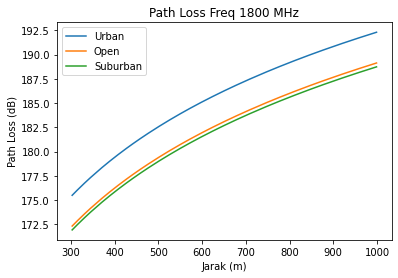

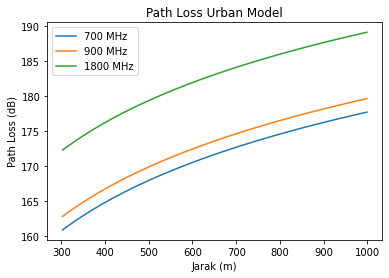

In [23]:
plt.figure()
plt.title('Path Loss Freq 1800 MHz')
plt.plot(d_sort, Urban_sort, label='Urban')
plt.plot(d_sort, Open_sort, label='Open')
plt.plot(d_sort, Suburban_sort, label='Suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

#Model Urban
plt.figure()
plt.title('Path Loss Urban Model')
plt.plot(d_sort, f2_sort, label='700 MHz')
plt.plot(d_sort, f_sort, label='900 MHz')
plt.plot(d_sort, f3_sort, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [24]:
#Daya Transmitter
def daytrans (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [25]:
PTUrban = daytrans(power_tran, Urban_sort, gain_tran, gain_rece)
PTSuburban = daytrans(power_tran, Suburban_sort, gain_tran, gain_rece)
PTOpen = daytrans(power_tran, Open_sort, gain_tran, gain_rece)
PTUrban2 = daytrans(power_tran, f_sort, gain_tran, gain_rece)
PTUrban3 = daytrans(power_tran, f2_sort, gain_tran, gain_rece)

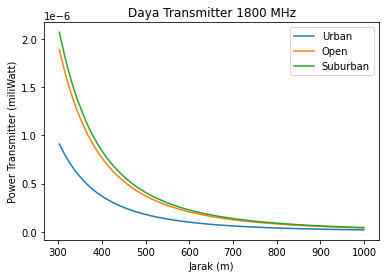

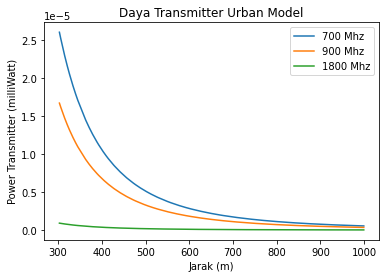

In [26]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Transmitter 1800 MHz")
plt.plot(d_sort, PTUrban, label = "Urban")
plt.plot(d_sort, PTOpen, label = "Open")
plt.plot(d_sort, PTSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Transmitter Urban Model")
plt.plot(d_sort, PTUrban3, label = "700 Mhz")
plt.plot(d_sort, PTUrban2, label = "900 Mhz")
plt.plot(d_sort, PTUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

In [27]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [29]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

In [30]:
#Signal to Noise Ratio
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [31]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

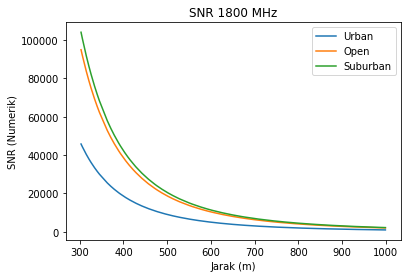

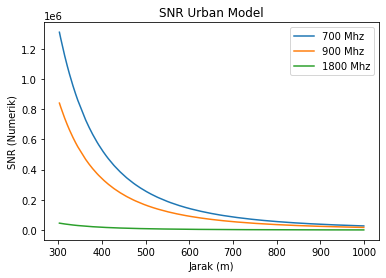

In [32]:
#SNR Frekuensi 1800 MHz
plt.figure()
plt.title("SNR 1800 MHz")
plt.plot(d_sort, SNRUrban, label = "Urban")
plt.plot(d_sort, SNROpen, label = "Open")
plt.plot(d_sort, SNRSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#SNR Urban Model
plt.figure()
plt.title("SNR Urban Model")
plt.plot(d_sort, SNRUrban3, label = "700 Mhz")
plt.plot(d_sort, SNRUrban2, label = "900 Mhz")
plt.plot(d_sort, SNRUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()


In [33]:
#Kapasitas Seluler 
def kapasitas (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [34]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
KapasitasUrban2 = kapasitas(SNRUrban2, bw)
KapasitasUrban3 = kapasitas(SNRUrban3, bw)

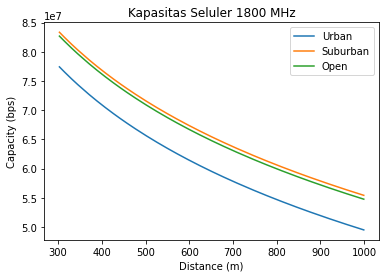

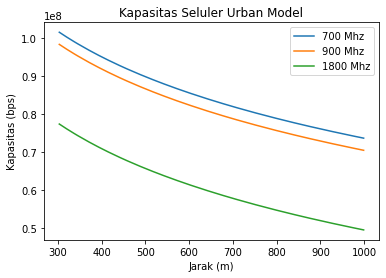

In [36]:
#Kapasitas Seluler 1800 Mhz
plt.figure()
plt.title("Kapasitas Seluler 1800 MHz")
plt.plot(d_sort,KapasitasUrban, label = "Urban")
plt.plot(d_sort,KapasitasSuburban, label = "Suburban")
plt.plot(d_sort,KapasitasOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

#Kapasitas Seluler Urban Model 
plt.figure()
plt.title("Kapasitas Seluler Urban Model")
plt.plot(d_sort, KapasitasUrban3, label = "700 Mhz")
plt.plot(d_sort, KapasitasUrban2, label = "900 Mhz")
plt.plot(d_sort, KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()